Import Libraries

In [37]:
# Importing the required libraries
import pandas as pd
import numpy as np
import shap
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import warnings

In [38]:
# reading the data
df = pd.read_csv('C:/Users/raman/OneDrive/Important/1UnisaSTUDY/Courses/Capstone_Project_1/Dataset/Nour Moustafa/CSV Files/Training and Testing Sets/UNSW_NB15_training-set.csv')

In [39]:
# Sample for faster run time
data = df.sample(n=10000, random_state=123)

#Use the full Dataset
#data = df

# Drop the 'id' and 'label' columns
data = data.drop(columns=['id', 'label'])

# 'attack_cat' is the target column
# Separate features and target
X = data.drop('attack_cat', axis=1)
y = data['attack_cat']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Apply OneHotEncoder to categorical columns
encoder = OneHotEncoder(sparse_output=False, drop='first')
X_encoded = encoder.fit_transform(X[categorical_cols])

# Convert the encoded features to a DataFrame
X_encoded_data = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns and concatenate the encoded columns
X = X.drop(categorical_cols, axis=1)
X = pd.concat([X, X_encoded_data], axis=1)

# Normalize numerical features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Ensuring the number of samples in X and y are the same
X, y = X[:len(y)], y[:len(X)]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Build the model
random_forest_model = RandomForestClassifier(max_features=2, n_estimators=100, bootstrap=True)

# Fit the model
random_forest_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = random_forest_model.predict(X_test)


# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7845
Classification Report:
                 precision    recall  f1-score   support

      Analysis       0.08      0.04      0.05        24
      Backdoor       0.00      0.00      0.00        21
           DoS       0.33      0.23      0.27       138
      Exploits       0.62      0.82      0.71       373
       Fuzzers       0.62      0.68      0.65       212
       Generic       1.00      0.98      0.99       451
        Normal       0.93      0.86      0.89       646
Reconnaissance       0.80      0.73      0.76       118
     Shellcode       0.43      0.21      0.29        14
         Worms       0.00      0.00      0.00         3

      accuracy                           0.78      2000
     macro avg       0.48      0.46      0.46      2000
  weighted avg       0.78      0.78      0.78      2000

Confusion Matrix:
 [[  1   0   4  17   1   0   1   0   0   0]
 [  0   0   4  16   1   0   0   0   0   0]
 [  2   5  32  82   7   0   0  10   0   0]
 [  3   4  42 307   9   

c:\Users\raman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\raman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\raman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

 99%|===================| 19882/20000 [02:07<00:00]        

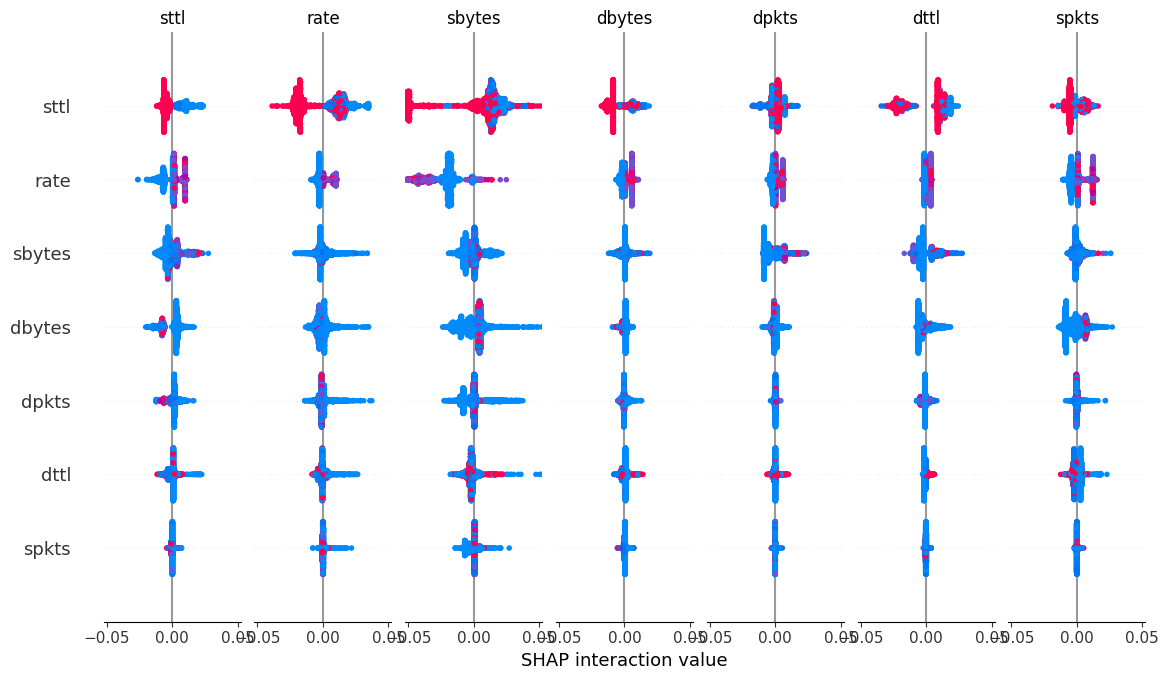

In [40]:
# SHAP explanation
# Load the SHAP explainer
explainer = shap.Explainer(random_forest_model, X_train)

# Compute SHAP values with additivity check disabled
shap_values = explainer(X_test, check_additivity=False)

# Plot summary plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns)
